# Crime Data from St. Louis Missouri (2008-2015)
## Loading and Cleaning the Data

In [1]:
import gmaps
import numpy as np
import pandas as pd
import requests
import time
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [2]:
# Prepare list of files to load.
load_urls = ['2008_data.csv', '2009.csv', '2010.csv', '2011.csv', '2012.csv', '2013.csv', '2014.csv', '2015.csv']

# Create list of columns we want to use in the final DF.
column_names = ['CADAddress', 'CADStreet', 'CodedMonth', 'Count', 'Crime', 'ShortCrimeCode', 'UCRType',\
                'UCRCrime', 'DateOccured', 'Description', 'District', 'FlagCrime', 'FlagUnfounded',\
                'ILEADSAddress','ILEADSStreet', 'LocationComment', 'LocationName', 'Neighborhood',\
                'NeighborhoodName', 'NeighborhoodPrimaryDistrict', 'NeighborhoodAddlDistrict', 'Latitude',\
                'Longitude', 'Year']

In [3]:
# Create empty DF for crime data
crime_df = pd.DataFrame(columns = column_names)

# Read single year crime files and store into final data frame
for file in load_urls:
    load_df = pd.read_csv(f'Resources/{file}')
    
    # Select only the columns we want from the single year csv.
    load_df = load_df[column_names]
    
    # Append data from the single year csv into the final DF
    crime_df = crime_df.append(load_df,ignore_index=True)

In [4]:
# Preview data
crime_df.head()

,CADAddress,CADStreet,CodedMonth,Count,Crime,ShortCrimeCode,UCRType,UCRCrime,DateOccured,Description,...,ILEADSStreet,LocationComment,LocationName,Neighborhood,NeighborhoodName,NeighborhoodPrimaryDistrict,NeighborhoodAddlDistrict,Latitude,Longitude,Year
0,4900,MAPLE,2008-04,1,177000,17,2,Sex Offenses,1/1/2000,SEX OFFNS-INCEST,...,MAPLE AVE,NaN,NaN,53.0,Fountain Park,8.0,NaN,38.658845,-90.260116,2008.0
1,4357,CALIFORNIA,2008-04,1,67501,6,1,Larceny-theft,1/1/2003,LARCENY-FROM BUILDING OVER $25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4313,MARGARETTA,2008-04,1,115400,11,2,Fraud,1/1/2004,STLG BY DECEIT/IDENTITY THEFT REPORT,...,MARGARETTA AVE,NaN,NaN,68.0,O'Fallon,5.0,6.0,38.671754,-90.233544,2008.0
3,3939,OHIO,2008-04,1,115400,11,2,Fraud,1/1/2006,STLG BY DECEIT/IDENTITY THEFT REPORT,...,OHIO AVE,NaN,NaN,16.0,Dutchtown,1.0,NaN,38.583504,-90.230145,2008.0
4,2612,ANNIE MALONE DR,2008-04,1,91113,9,2,Other assaults,1/1/2007,SIMPLE ASSAULT-ADULT/NO INJURY,...,ANNIE MALONE DR,@ANNIE MALONE HOME,NaN,57.0,The Ville,8.0,NaN,38.659580,-90.236606,2008.0


In [5]:
# How many records do we have?
crime_df['CADAddress'].count()

449000

In [6]:
# Remove rows that do not have location information complete.
crime_df = crime_df.loc[(pd.isna(crime_df['Latitude'])==False) & (pd.isna(crime_df['Longitude'])==False) & (pd.isna(crime_df['NeighborhoodName'])==False)]

In [7]:
# How many records do we have after dropping nulls?
crime_df['CADAddress'].count()

435650

In [8]:
# I had issues with indexing into the list created by the split string funtion for reach row so I created a new column for the
## split string then did a for loop to assign the year from that column to the year column if the year column is null.

crime_df['Year_calc'] = crime_df['CodedMonth'].str.split('-')

for index in crime_df.index:
    if pd.isna(crime_df['Year'][index]) == True:
        crime_df['Year'][index] =  crime_df['Year_calc'][index][0]
crime_df.head()

,CADAddress,CADStreet,CodedMonth,Count,Crime,ShortCrimeCode,UCRType,UCRCrime,DateOccured,Description,...,LocationComment,LocationName,Neighborhood,NeighborhoodName,NeighborhoodPrimaryDistrict,NeighborhoodAddlDistrict,Latitude,Longitude,Year,Year_calc
0,4900,MAPLE,2008-04,1,177000,17,2,Sex Offenses,1/1/2000,SEX OFFNS-INCEST,...,NaN,NaN,53.0,Fountain Park,8.0,NaN,38.658845,-90.260116,2008.0,"[2008, 04]"
2,4313,MARGARETTA,2008-04,1,115400,11,2,Fraud,1/1/2004,STLG BY DECEIT/IDENTITY THEFT REPORT,...,NaN,NaN,68.0,O'Fallon,5.0,6.0,38.671754,-90.233544,2008.0,"[2008, 04]"
3,3939,OHIO,2008-04,1,115400,11,2,Fraud,1/1/2006,STLG BY DECEIT/IDENTITY THEFT REPORT,...,NaN,NaN,16.0,Dutchtown,1.0,NaN,38.583504,-90.230145,2008.0,"[2008, 04]"
4,2612,ANNIE MALONE DR,2008-04,1,91113,9,2,Other assaults,1/1/2007,SIMPLE ASSAULT-ADULT/NO INJURY,...,@ANNIE MALONE HOME,NaN,57.0,The Ville,8.0,NaN,38.659580,-90.236606,2008.0,"[2008, 04]"
5,5500,DELMAR,2008-04,1,21000,2,1,Forcible Rape,1/1/2008,RAPE -- FORCIBLE,...,NaN,NaN,49.0,Visitation Park,7.0,NaN,38.654057,-90.278155,2008.0,"[2008, 04]"


In [9]:
# Remove the no longer needed Year_calc column
crime_df.drop('Year_calc', inplace=True, axis=1)

In [10]:
# Change the data type of the year and count column to be an int to remove the decimal
crime_df['Year'] = crime_df['Year'].astype('int')
crime_df['Count'] = crime_df['Count'].astype('int')

crime_df.head()

,CADAddress,CADStreet,CodedMonth,Count,Crime,ShortCrimeCode,UCRType,UCRCrime,DateOccured,Description,...,ILEADSStreet,LocationComment,LocationName,Neighborhood,NeighborhoodName,NeighborhoodPrimaryDistrict,NeighborhoodAddlDistrict,Latitude,Longitude,Year
0,4900,MAPLE,2008-04,1,177000,17,2,Sex Offenses,1/1/2000,SEX OFFNS-INCEST,...,MAPLE AVE,NaN,NaN,53.0,Fountain Park,8.0,NaN,38.658845,-90.260116,2008
2,4313,MARGARETTA,2008-04,1,115400,11,2,Fraud,1/1/2004,STLG BY DECEIT/IDENTITY THEFT REPORT,...,MARGARETTA AVE,NaN,NaN,68.0,O'Fallon,5.0,6.0,38.671754,-90.233544,2008
3,3939,OHIO,2008-04,1,115400,11,2,Fraud,1/1/2006,STLG BY DECEIT/IDENTITY THEFT REPORT,...,OHIO AVE,NaN,NaN,16.0,Dutchtown,1.0,NaN,38.583504,-90.230145,2008
4,2612,ANNIE MALONE DR,2008-04,1,91113,9,2,Other assaults,1/1/2007,SIMPLE ASSAULT-ADULT/NO INJURY,...,ANNIE MALONE DR,@ANNIE MALONE HOME,NaN,57.0,The Ville,8.0,NaN,38.659580,-90.236606,2008
5,5500,DELMAR,2008-04,1,21000,2,1,Forcible Rape,1/1/2008,RAPE -- FORCIBLE,...,DELMAR BLVD,NaN,NaN,49.0,Visitation Park,7.0,NaN,38.654057,-90.278155,2008


In [11]:
# Remove row where CADStreet is unknown
crime_df = crime_df.loc[crime_df['CADStreet'] != 'unknown 0000']

In [12]:
crime_df

,CADAddress,CADStreet,CodedMonth,Count,Crime,ShortCrimeCode,UCRType,UCRCrime,DateOccured,Description,...,ILEADSStreet,LocationComment,LocationName,Neighborhood,NeighborhoodName,NeighborhoodPrimaryDistrict,NeighborhoodAddlDistrict,Latitude,Longitude,Year
0,4900,MAPLE,2008-04,1,177000,17,2,Sex Offenses,1/1/2000,SEX OFFNS-INCEST,...,MAPLE AVE,NaN,NaN,53.0,Fountain Park,8.0,NaN,38.658845,-90.260116,2008
2,4313,MARGARETTA,2008-04,1,115400,11,2,Fraud,1/1/2004,STLG BY DECEIT/IDENTITY THEFT REPORT,...,MARGARETTA AVE,NaN,NaN,68.0,O'Fallon,5.0,6.0,38.671754,-90.233544,2008
3,3939,OHIO,2008-04,1,115400,11,2,Fraud,1/1/2006,STLG BY DECEIT/IDENTITY THEFT REPORT,...,OHIO AVE,NaN,NaN,16.0,Dutchtown,1.0,NaN,38.583504,-90.230145,2008
4,2612,ANNIE MALONE DR,2008-04,1,91113,9,2,Other assaults,1/1/2007,SIMPLE ASSAULT-ADULT/NO INJURY,...,ANNIE MALONE DR,@ANNIE MALONE HOME,NaN,57.0,The Ville,8.0,NaN,38.659580,-90.236606,2008
5,5500,DELMAR,2008-04,1,21000,2,1,Forcible Rape,1/1/2008,RAPE -- FORCIBLE,...,DELMAR BLVD,NaN,NaN,49.0,Visitation Park,7.0,NaN,38.654057,-90.278155,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448995,4310,WILCOX,2015-09,1,65701,6,1,Larceny-theft,12/1/13 8:00,LARCENY-MTR VEH PARTS UNDER $500,...,WILCOX AVE,NaN,NaN,5.0,Bevo Mill,1.0,NaN,38.580835,-90.267600,2015
448996,3900,23RD,2015-09,1,21000,2,1,Forcible Rape,12/20/13 8:00,RAPE -- FORCIBLE,...,N 23RD ST,NaN,NaN,65.0,Hyde Park,5.0,NaN,35.801506,-93.265663,2015
448997,3320,LAWN,2015-09,1,91114,9,2,Other assaults,12/22/14 16:00,"ASSAULT, ADULT, AGE 17 AND UP-DOMESTIC",...,LAWN AVE,NaN,NaN,14.0,North Hampton,2.0,NaN,38.599216,-90.271246,2015
448998,,,2015-09,-1,31111,3,1,Robbery,12/26/14 21:20,ROBBERY-HIGHWAY /FIREARM USED/SUCCESSFUL,...,FLORISSANT,NaN,NaN,60.0,St. Louis Place,4.0,5.0,35.801506,-93.265663,2015


## Trends Per Year

## Offenses Per Neighborhood

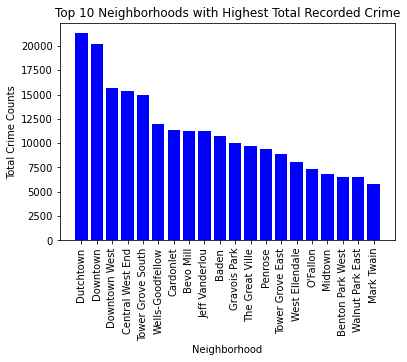

In [17]:
# Remove where the Neighborhood is unknown.
nh_crime = crime_df.loc[crime_df['NeighborhoodName']!= 'Unknown']

# Create a DF that is a simple groupby NeighborhoodName to reference in the overall analysis.
crime_nh = nh_crime.groupby(['Neighborhood', 'NeighborhoodName'])

# Create DF that holds the total count of crimes per neighborhood.
nh_tot = crime_nh['Count'].sum().reset_index()

# Take only the largest 20 crime counts (89 neighborhoods makes the graph impossible to read.)
nh_tot_top = nh_tot.nlargest(20,'Count')

# Plot as a bar chart.
plt.bar(nh_tot_top['NeighborhoodName'], nh_tot_top['Count'], color="b", align="center")
plt.xticks(nh_tot_top['NeighborhoodName'], nh_tot_top['NeighborhoodName'], rotation='vertical')

plt.xlabel('Neighborhood')
plt.ylabel('Total Crime Counts')

plt.title('Top 10 Neighborhoods with Highest Total Recorded Crime')

plt.savefig('Output/WorstNeighborhoods.png')

plt.show()

No handles with labels found to put in legend.


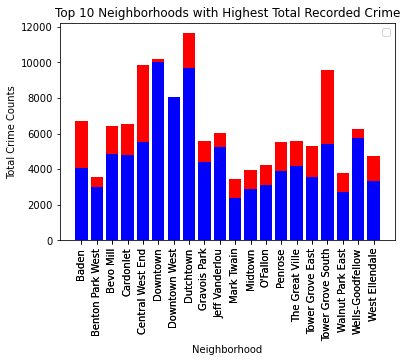

In [91]:
# For the top 20 most "dangerous" Neighborhoods, rank by percent of violent crimes.
top_twenty = pd.merge(crime_df,nh_tot_top, on=['NeighborhoodName', 'Neighborhood'], how='right',suffixes=('', '_Total') )
top_twenty = top_twenty.groupby(['NeighborhoodName', 'UCRType']).agg({'Count':'sum', 'Count_Total':'mean'}).reset_index()

colors = {1:'red', 2:'blue'}
c = top_twenty['UCRType'].apply(lambda x: colors[x])

# Plot as a bar chart.
plt.bar(top_twenty['NeighborhoodName'], top_twenty['Count'], color=c, align="center")
plt.xticks(top_twenty['NeighborhoodName'], top_twenty['NeighborhoodName'], rotation='vertical')

plt.xlabel('Neighborhood')
plt.ylabel('Total Crime Counts')

plt.title('Top 10 Neighborhoods with Highest Total Recorded Crime')

plt.savefig('Output/WorstNeighborhoods_UCRPct.png')

plt.show()

([<matplotlib.patches.Wedge at 0x1f90e0c2e80>,
 [Text(-0.5660161611815178, -1.0581236720163378, 'Violent'),
  Text(0.5188482385626865, 0.9699466507702359, 'Non-Violent')],
 [Text(-0.33017609402255205, -0.617238808676197, '56.6%'),
  Text(0.2830081301251017, 0.5290618095110377, '43.4%')])

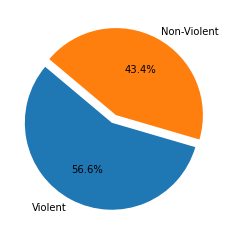

In [81]:
top_twenty = top_twenty.groupby(['UCRType']).agg({'Count':'sum'}).reset_index()
# top_twenty
explode = (0.1,0)
plt.pie(top_twenty['Count'],explode=explode, labels=['Violent', 'Non-Violent'],
        autopct="%1.1f%%", shadow=False, startangle=140)

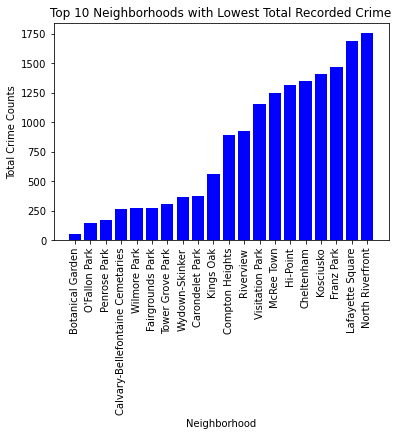

In [61]:
# Take only the largest 20 crime counts (89 neighborhoods makes the graph impossible to read.)
nh_tot_bottom = nh_tot.nsmallest(20,'Count')

# Plot as a bar chart.
plt.bar(nh_tot_bottom['NeighborhoodName'], nh_tot_bottom['Count'], color="b", align="center")
plt.xticks(nh_tot_bottom['NeighborhoodName'], nh_tot_bottom['NeighborhoodName'], rotation='vertical')

plt.xlabel('Neighborhood')
plt.ylabel('Total Crime Counts')
plt.title('Top 10 Neighborhoods with Lowest Total Recorded Crime')

plt.savefig('Output/BestNeighborhoods.png')

plt.show()

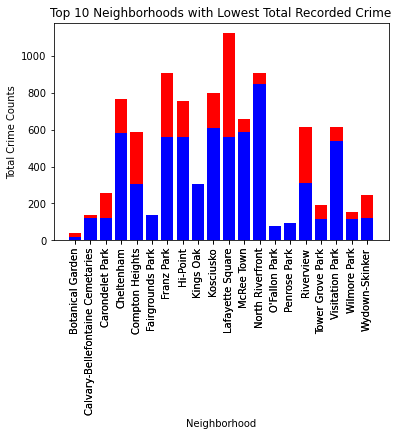

In [89]:
# For the top 20 least "dangerous" Neighborhoods, rank by percent of violent crimes.
bottom_twenty = pd.merge(crime_df,nh_tot_bottom, on=['NeighborhoodName', 'Neighborhood'], how='right',suffixes=('', '_Total') )
bottom_twenty = bottom_twenty.groupby(['NeighborhoodName', 'UCRType']).agg({'Count':'sum', 'Count_Total':'mean'}).reset_index()

colors = {1:'red', 2:'blue'}
c = bottom_twenty['UCRType'].apply(lambda x: colors[x])

# Plot as a bar chart.
plt.bar(bottom_twenty['NeighborhoodName'], bottom_twenty['Count'], color= c, align="center") #bottom_twenty['UCRType'].map(colors), align="center")
plt.xticks(bottom_twenty['NeighborhoodName'], bottom_twenty['NeighborhoodName'], rotation='vertical')

plt.xlabel('Neighborhood')
plt.ylabel('Total Crime Counts')

plt.title('Top 10 Neighborhoods with Lowest Total Recorded Crime')

plt.savefig('Output/BestNeighborhoods_UCRPct.png')

plt.show()

In [84]:
bottom_twenty = bottom_twenty.groupby(['UCRType']).agg({'Count':'sum'}).reset_index()
bottom_twenty
# explode = (0.1,0)
# plt.pie(bottom_twenty['Count'],explode=explode, labels=['Violent', 'Non-Violent'],
#         autopct="%1.1f%%", shadow=False, startangle=140)
# plt.title('Pct of Violent Crime - 20 Most Crime Reported Neighborhoods ')

# plt.savefig('Output/WorstNeighborhoods_UCRPie.png')

,UCRType,Count
0,1,9307
1,2,6685


([<matplotlib.patches.Wedge at 0x1f900da3c18>,
 [Text(0.9790457694053196, -1.2654917547773854, 'Larceny-theft'),
  Text(-0.5424253088236763, 0.9569612240564085, 'Aggravated Assault'),
  Text(-0.6730939868305751, 0.8700255656545511, 'Other'),
  Text(-0.7900604114930451, 0.7653786946286396, 'Burglary')],
 [Text(0.6730939664661572, -0.8700255814094524, '93.2%'),
  Text(-0.2958683502674598, 0.5219788494853137, '2.3%'),
  Text(-0.3671421746348591, 0.4745593994479369, '2.3%'),
  Text(-0.43094204263256997, 0.41747928797925793, '2.3%')])

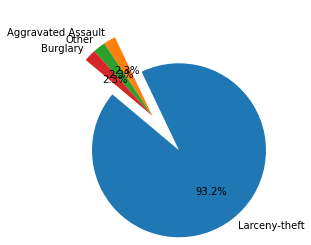

In [56]:
crime_nh = nh_crime.groupby(['NeighborhoodName','UCRCrime'])
nh_offense = crime_nh['Count'].sum().reset_index()

idx = nh_offense.groupby(['NeighborhoodName'])['Count'].transform(max) == nh_offense['Count']
nh_offense = nh_offense[idx]

# Maybe a pie chart or a bar chart for this???
common_crimes = nh_offense['UCRCrime'].value_counts().reset_index()

explode = (0.5,0,0,0)
plt.pie(common_crimes['UCRCrime'],explode=explode, labels=common_crimes['index'],
        autopct="%1.1f%%", shadow=False, startangle=140)

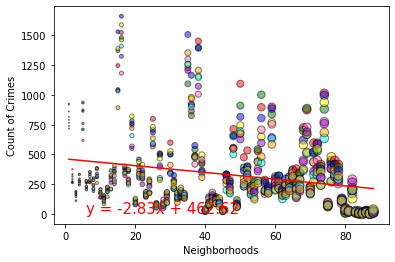

In [16]:
this_df = nh_crime.loc[nh_crime['UCRType']==1]
crime_nh = this_df.groupby(['Neighborhood', 'NeighborhoodName', 'Year'])

# Create scatterplot of total crimes per neighborhood.
nh_tot = crime_nh['Count'].sum().reset_index()

yr_colors = {2008:'red', 2009:'green', 2010:'blue', 2011:'yellow', 2012:'hotpink', 2013:'darkviolet', 2014:'aqua', 2015:'orange'}

x_axis = nh_tot['Year']
x_values = nh_tot['Neighborhood']
y_values = nh_tot['Count']
labels = nh_tot['NeighborhoodName']

plt.scatter(x_values, y_values, marker="o", c=nh_tot['Year'].map(yr_colors), edgecolors="black",
            s=x_values, alpha=0.5)
# plt.xticks(x_values, labels, rotation='vertical')

# Create the regression line to see if there is a relationship between the Neighborhood and the count of crime
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel('Neighborhoods')
plt.ylabel('Count of Crimes')

plt.show()

## Heat Maps